# Import library

In [1]:
import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from string import ascii_lowercase

# Import Data

## Nino 3.4

### Access

In [2]:
nino_Access_filenames = []
nino_Access_filenames = sorted(glob.glob("/g/data/w97/sl7808/Nino34/4_detrend/*.nc")) 
file_name = []
f=[]
land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf



for n in nino_Access_filenames:
    a = xr.open_dataset(n)
    
    dataout = np.empty(165,dtype=np.float64)
    start_year = 1850
    for yy in range(165):
        yr=yy+1850
        start_string = '%s-12-01' %(yr)
        end_string = '%s-02-28' %(yr+1)
        dataout[yy] = a.tos.sel(time=slice(start_string,end_string)).mean(dim='time') #sel DJF

    dm_new = xr.DataArray(
                    data   = dataout,
                    dims   = ['time'],
                    coords = {'time': pd.date_range("3/1/1850", freq="Y", periods=165)},

                    )
    
    sd=dm_new.sel(time=slice('1961-01-01','1990-12-31')).std(dim='time')
    nor_dm=dm_new/sd
    
    nor_dm.plot
    
    f.insert(-1,nor_dm)
    
nino_Access=xr.concat(f, 'ensemble')


### Observation

In [3]:

a = xr.open_dataset("/g/data/w97/sl7808/Nino34_HADISST/4_detrend.nc")

dataout = np.empty(150,dtype=np.float64)
start_year = 1870
for yy in range(150):
    yr=yy+1870
    start_string = '%s-12-01' %(yr)
    end_string = '%s-02-28' %(yr+1)
    dataout[yy] = a.sst.sel(time=slice(start_string,end_string)).mean(dim='time') #sel DJF

dm_new = xr.DataArray(
                data   = dataout,
                dims   = ['time'],
                coords = {'time': pd.date_range("3/1/1870", freq="Y", periods=150)},
                )

sd=dm_new.sel(time=slice('1961-01-01','1990-12-31')).std(dim='time')
nor_dm=dm_new/sd
    

nino_obs=nor_dm

nino_obs=nino_obs.rename({'time':'year'})






## DMI

### Access

In [4]:
d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/DMI_ACCESS/*.nc")) 

file_name = []
f=[]
for d in d_filenames:   
    
    a = xr.open_dataset(d)
    DMI_p=a.sel(time=a.time.dt.month.isin([8,9,10])) #select DMI peak months
    x=DMI_p.tos.groupby('time.year').mean(dim='time')#take the mean of each year
    z=x.rename({'year':'time'})
    #del z['time']
    f.insert(-1,z)

pIOD_1=xr.concat(f, 'ensemble').isel(time=slice(0,164))
DMI_Access= xr.DataArray(
                data   = f,
                dims   = ['ensemble','time'],
                coords = {'ensemble':np.arange(1,21),'time': pd.date_range("3/1/1850", freq="Y", periods=165)},
                )

### Observation

In [5]:
DMI_obs_1= xr.open_dataset("/g/data/w97/sl7808/ALLOUTPUT/DMI_OBS/9_norm.nc")
DMI_obs_2=DMI_obs_1.sel(time=DMI_obs_1.time.dt.month.isin([8,9,10])) #select DMI peak months
DMI_obs=DMI_obs_2.groupby('time.year').mean(dim='time')#take the mean of each year
DMI_obs['year']=pd.Series(pd.date_range("3/1/1870", freq="Y", periods=150))
DMI_obs=DMI_obs.rename({'year':'time'})
del DMI_obs['dim_0']
del DMI_obs['lat']
del DMI_obs['lon']
DMI_obs=DMI_obs.rename({'dim_0':'time'})

## HWC

In [6]:
cum_filenames = []
cum_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/Cumheat_ACCESS/*.nc")) 
file_name = []
f=[]


for c in cum_filenames:
        
    a = xr.open_dataset(c)
    a2=a.HWC
    f.insert(-1,a2)


cum20_access= xr.DataArray(
            data   = f,
            dims   = ['ensemble','time','lat','lon'],
            coords = {'ensemble':np.arange(1,21),'time': pd.date_range("3/1/1850", freq="Y", periods=164),'lat':a.lat,'lon':a.lon},
            )

# Plot

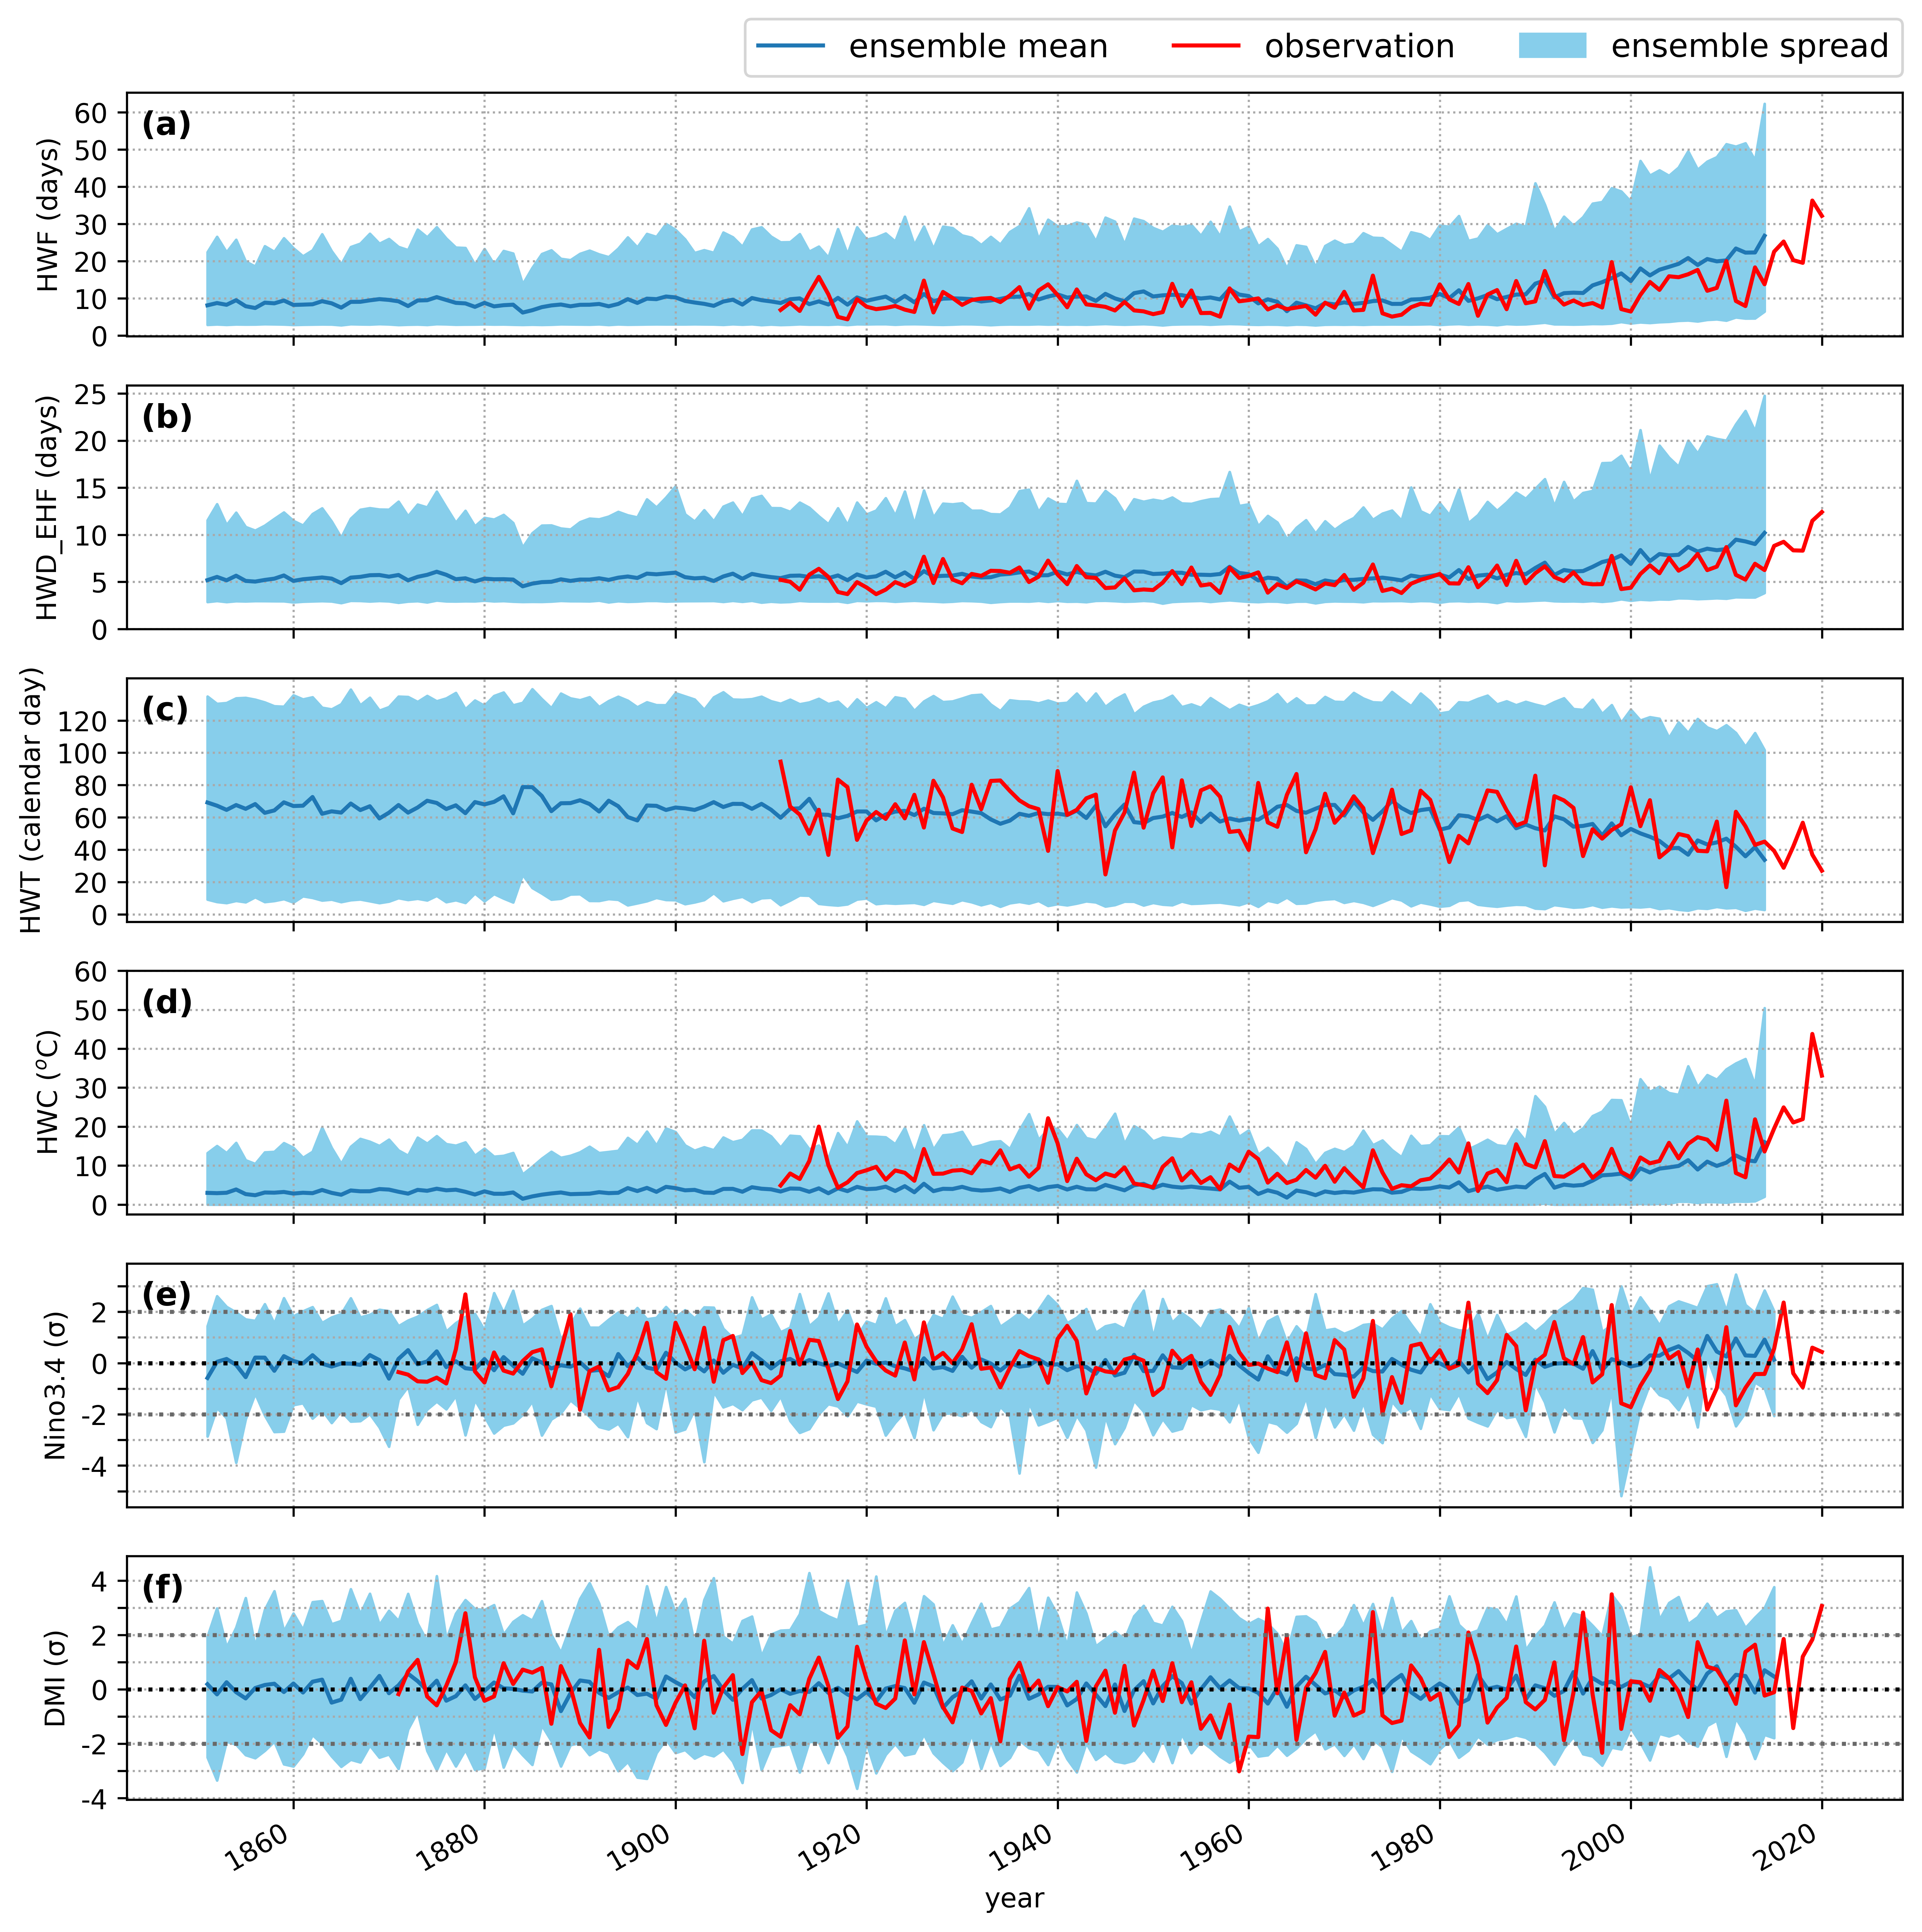

In [7]:
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF"]
HWX_list_2 =["HWF (days)","HWD_EHF (days)","HWT (calendar day)"]

f, axes = plt.subplots(6, 1, figsize=(10,10), sharex='col',dpi=600) 
num = 0
iii=["i. ",'ii. ','iii. ']


#plot Subplot a-c
for h,iiii,h2 in zip (HWX_list,iii,HWX_list_2): 


    # plot ensembles  1850-2014

    ##concat ensembles 
    a_time=pd.Series(pd.date_range("3/1/1850", freq="Y", periods=165))

    d_filenames = []
    d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_ensemble/ehf_year_exp*.nc")) 
    f=[]
    for d in d_filenames:   

        a = xr.open_dataset(d, decode_times=False)
        a1 = a[h]
        a2=a1.where(a1>0)
        f.insert(-1,a2)

    
    HWA= xr.DataArray(
                data   = f,
                dims   = ['ensemble','time','lat','lon'],
                coords = {'ensemble':np.arange(1,21),'time': pd.date_range("3/1/1850", freq="Y", periods=165),'lat':a1.lat,'lon':a1.lon},
                )
    HWA_Access_x=HWA.max(dim="ensemble").mean(dim='lat').mean(dim='lon')
    HWA_Access_n=HWA.min(dim="ensemble").mean(dim='lat').mean(dim='lon')

    ##plot ensembels 
    axes[num].fill_between(a_time,HWA_Access_x,HWA_Access_n,color="skyblue",label="ensemble spread")
    HWA.mean(dim='lat').mean(dim='lon').mean(dim="ensemble").plot(ax=axes[num], label="ensemble mean")



    #plot obs 1900-2020

    ##select HWA, fix up year 
    HWA_obs = xr.open_dataset("/g/data/w97/sl7808/ehf_AGCD/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWA_obs['time']=pd.Series(pd.date_range("3/1/1910", freq="Y", periods=111))
    del HWA_obs['dim_0']
    HWA_obs=HWA_obs.rename({'dim_0':'time'})
    a1 = HWA_obs[h]
    a2=a1.where(a1>0)
    a2.mean(dim='lat').mean(dim='lon').plot(ax=axes[num],color="red",label='observation')



    #plot asthetics 
    axes[num].set_xlabel('')
    axes[num].set_ylabel(h2)
    

    axes[0].legend(bbox_to_anchor=(0., 1.2, 1., .102), loc=1,ncol=4, borderaxespad=0.,fontsize='large')
    num=num+1
    
    


#Plot Subplot d

cum20_x=cum20_access.max(dim="ensemble").mean(dim='lat').mean(dim='lon')
cum20_n=cum20_access.min(dim="ensemble").mean(dim='lat').mean(dim='lon')

##plot ensembels 
a_time=pd.Series(pd.date_range("3/1/1850", freq="Y", periods=164))
axes[3].fill_between(a_time,cum20_x,cum20_n,color="skyblue",label="ensemble spread")
cum20_access.mean(dim='lat').mean(dim='lon').mean(dim="ensemble").plot(ax=axes[3], label="ensemble mean")


cum20_obs = xr.open_dataset("/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/original/cumheat_obs.nc",decode_times=False)

cum20_obs['year']=pd.Series(pd.date_range("3/1/1910", freq="Y", periods=110))
del cum20_obs['dim_0']
cum20_obs=cum20_obs.rename({'dim_0':'year'})
a1 = cum20_obs.HWC
a2=a1.where(a1>0)


##plot obs 
a2.mean(dim='lon').mean(dim='lat').plot(ax=axes[3],color="red",label='observation')
axes[3].set_xlabel('')
axes[3].set_ylabel('HWC ($^o$C)')

    

#Plot Subplot e - nino3.4


nino_Access_x=nino_Access.max(dim="ensemble")
nino_Access_n=nino_Access.min(dim="ensemble")

a=pd.Series(pd.date_range("3/1/1850", freq="Y", periods=165))
axes[4].fill_between(a,nino_Access_x,nino_Access_n,color="skyblue",label="ensemble spread")
nino_Access.mean(dim="ensemble").plot(ax=axes[4], label="ensemble mean")
nino_obs.plot(ax=axes[4],color="red",label='observation')
axes[4].set_ylabel('Nino3.4 (σ)')
axes[4].set_xlabel('')
axes[4].axhline(y=0, color='black', linestyle=':') 
axes[4].set_title('')



#Plot Subplot f - DMI

DMI_Access_x=DMI_Access.max(dim="ensemble")
DMI_Access_n=DMI_Access.min(dim="ensemble")

axes[5].fill_between(DMI_Access_x.time,DMI_Access_x,DMI_Access_n,color="skyblue",label="ensemble spread")
DMI_Access.mean(dim="ensemble").plot(ax=axes[5], label="ensemble mean")

DMI_obs.sst.plot(ax=axes[5],color="red",label='observation')
axes[5].set_ylabel('DMI (σ)')
axes[5].set_xlabel('year')
axes[5].set_title('')



#add gridlines

axes[0].set_yticks(np.arange(0, 70, step=10))
axes[1].set_yticks(np.arange(0, 30, step=5))
axes[2].set_yticks(np.arange(0, 130, step=20))
axes[3].set_yticks(np.arange(0, 70, step=10))


for bbb in range (4,6):
    axes[bbb].axhline(y=0, color='black', linestyle=':') 
    axes[bbb].axhline(y=-2, color='dimgrey', linestyle=':')
    axes[bbb].axhline(y=2, color='dimgrey', linestyle=':')
    

axes[4].set_yticks(np.arange(-5, 4, step=1))
axes[4].set_yticklabels(['',-4,'',-2,'',0,'',2,''])
    
axes[5].set_yticks(np.arange(-4, 5, step=1))
axes[5].set_yticklabels([-4,'',-2,'',0,'',2,'',4])



#Add labels
for aaa in range(0,6):
    axes[aaa].text(0.008,0.80,'(%s)' %(ascii_lowercase[aaa]),
            horizontalalignment='left',verticalalignment='bottom',
            transform = axes[aaa].transAxes,fontweight='bold', fontsize=12)
    axes[aaa].grid(b=None, which='major', axis='both',linestyle='dotted',color='darkgrey')
    


    
    
    
    
plt.tight_layout()